In [ ]:
'''
Created on May 20, 2018
Description: plot basic spectrums of the audio file

ffmpeg -i input.mp3 output.wav
'''

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys
from scipy.fftpack import fft, ifft, fftshift
from scipy.signal import argrelextrema, find_peaks_cwt, general_gaussian, fftconvolve
from math import pi, log, floor

import warnings
warnings.simplefilter("once", DeprecationWarning)

In [2]:
class calc():
    def __init__(self):
        pass
        
    def nextpow2(self, x):
        return 1 if x == 0 else 2**(x-1).bit_length()
    
class AudioSpec():
    def __init__(self, file):
        self.wf = wave.open(file, 'rb')
        self.data = self.wf.readframes(-1)
        self.data = np.frombuffer(self.data, 'Int16')
        self.data = self.data / (2.**15)
        self.calc_ins = calc()
        self.fs = self.wf.getframerate()
        
    def time_spec(self):
        self.len1 = len(self.data)
        self.len1 = self.calc_ins.nextpow2(self.len1)
#         self.t = np.arange(0, self.len1)
#         self.t = self.t / self.wf.getframerate()
        
    def freq_spec(self):
        self.y = fft(self.data, self.len1)
        self.y = abs(self.y)
        self.y = self.y / float(self.len1)
        self.y = self.y ** 2
#         self.y = fftshift(self.y)
        len2 = len(self.y)
#         self.freq = np.linspace(-2*pi, 2*pi, num = len2) # circuilar freq
        self.f = np.arange(0, len2) * self.fs / self.len1
#         indexes = find_peaks_cwt(self.y, np.arange(1, 100))
#         print indexes
    
    def plot_spec(self): 
        plt.figure(1)
        plt.title('Waveform in Time Domain')
        plt.plot(self.data)
        plt.xlabel('Time(s) / 22050')
        plt.ylabel('Amplitude')
        plt.show()
        
        plt.figure(2)
        plt.title('Waveform in Freq Domain')
        plt.plot(self.f[1:int(floor(self.len1/2))], self.y[1:int(floor(self.len1/2))])
#         plt.plot(abs(self.y))
        plt.xlabel('Frequency(Hz)')
        plt.ylabel('Amplitude')
        
        plt.figure(3)
        plt.title('Waveform in Freq Domain')
        plt.plot(self.f[1:int(floor(self.len1/2))], 10 * np.log10(self.y[1:int(floor(self.len1/2))]))
#         plt.plot(abs(self.y))
        plt.xlabel('Frequency(Hz)')
        plt.ylabel('Power(dB)')
        plt.show()
    
    def main(self):
        self.time_spec()
        self.freq_spec()
        self.plot_spec()
        

/home/wyd/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if sys.path[0] == '':


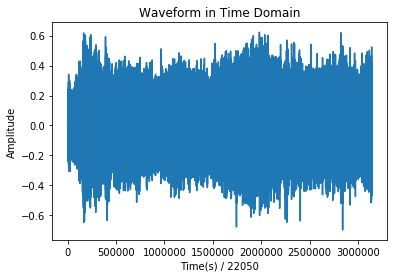

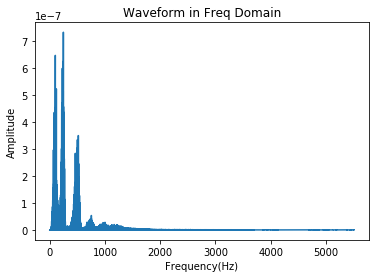

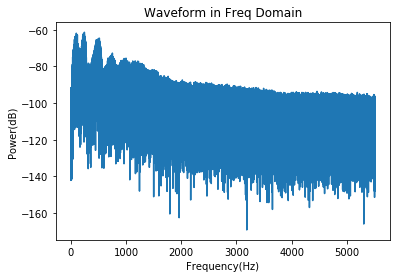

In [3]:
'''swarming sound'''
f1 = AudioSpec("../bee_sounds/bee_swarm_small.wav")
f1.main()

In [ ]:
'''no event inside the box'''
f2 = AudioSpec("../bee_sounds/bee_inside_box.wav")
f2.main()

In [ ]:
'''single bee buzzing'''
f3 = AudioSpec("../bee_sounds/bee_buzzing_single.wav")
f3.main()